<h1><center>Tarea 2 v2</center></h1>

Integrantes:
- Diego Méndez
- Sebastián Urbina

# PARTE 1:  EXPLORACIÓN DE DATOS Y VARIABLES

# 1. Investigue acerca de como se fija una tasa de interes para un credito:  regulaciones y factores que influyen en fijar la tasa ofrecida a cada persona.



Gran parte de los bancos utilizan los mismos parametros para definir la tasa de intereses a sus clientes, uno de estos es la estabilidad laboral de la persona, los bancos deben tener la certeza de que la persona pagará dicho monto solicitado, es por esto que no le interesa personas que oscilan en periodos de empleo y deseempleo. Junto a esto el ingreso mensual es otro factor que el banco pone mucho hincapie, por ejemplo si ganas un bajo sueldo a fin de mes no tendras mucho excedente de dinero por lo que probablemente tendras problemas al pagar o no podras pagar dicho monto. Tambien es importante la experencia con otros creditos y las deudas de la persona, al banco no le va a interesar una persona que tenga un mala reputacion con respecto a otros creditos ni tampoco si el individuo tiene un gran numero de deudas pendientes, recordamos que el banco pretende que se pague el prestamo. Otro factor sumamente inportante es la edad de la persona o el padecimiento de alguna enfermedad, esto influye directamente si el credito se le otorga o no al individuo, ya que una persona que tiene una baja expectativa de vida como un adulto mayor o una persona que padece de una enfermedad terminal, no le es rentable al banco solicitarle el credito. Por ultimo otro parametro utilizado por los bancos, es la 'insistencia' de la persona al solicitar el credito, esto se debe a que el cliente queda como 'desesperado' por el dinero, se podria considerar que esta persona esta tomando la decision de manera apresurada y con una alta valoracion al monto solicitado.


Otro metodo para fijar una tasa de interes, es a traves de una puntuacion FICO, esta es un tipo de puntuación de crédito creada por Fair Isaac Corporation. Los prestamistas utilizan las calificaciones FICO de los prestatarios junto con otros detalles sobre los informes de crédito, para evaluar el riesgo y determinar si extender el crédito. FICO cuenta con 5 areas para determinar la tasa ofrecida por el banco; historial de pagos, nivel actual de endeudamiento, tipos de crédito utilizados, duración del historial de crédito y nuevas cuentas de crédito. A mayor puntuacion de FICO menor riesgo representas para el banco, las puntuaciones oscilan entre 300 y 850 puntos, el rango entre 670 y 739 indican un historial de credito 'bueno', por el contrario entre 580 y 669 puede ser dificil obtener el monto solicitado.

<img src='https://www.investopedia.com/thmb/SBOkuFtkI3b5kfXCBoEBOwO-szk=/692x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/FICO-Scores-0474cc0ca87b4b58b9391f065f623c0f.jpg'>
Fuente: https://www.investopedia.com/terms/f/ficoscore.asp


# 2. Descargue los datos y analice las variables con las que cuenta. Evalue la necesidad denormalizar/estandarizar los datos o transformar las variables (por ejemplo a dummy oaplicar logaritmo). Justifique.

La descripción de las variables de nuestra base de datos es la siguiente:

*Cada ID representa un cliente

- Amount.Requested: Prestamo Solicitado por el cliente

- Amount.Funded.By.Investors: Monto del préstamo sancionado por el banco para los clientes

- Interest.Rates: La tasa de interés fijada por el banco para cada cliente.

- Loan.Length: Periodo de tenencia del préstamo

- Loan.Purpose: Propósito del Prestamo

- Debt.To.Income.Ratio: Proporción de las deudas totales del cliente en función de sus ingresos totales 

- State: Estado en el que reside el cliente

- Home.Ownershi: Estado de la vivienda propiedad del cliente.

- Monthly.Income: Ingresos mensuales del cliente

- FICO range: Rango de puntaje de crédito del cliente

-  Open.Credit.Lines: Cantidad de deudas paralelas que tienen los clientes

- Revolving.Credit.Balance: Saldo total de la deuda considerando todas las líneas de crédito abiertas

- Inquiries.in.last.6.months: Número de consultas de crédito en los últimos 6 meses(veces que se consultó por un credito)

- Employment.Length: Experiencia laboral de los clientes

In [6]:
#Importamos librerias a utilizar
library(dplyr)
library(ggplot2)
library(tidyr)

Comenzamos leyendo los datos

In [7]:
df <- read.csv('loan_data_train.csv',sep=',',check.names=FALSE)

Revisamos cuántos valores nulos tenemos

In [8]:
sapply(df,function(x) x=sum(is.na(x))) 

ID               Amount.Requested 
                             1                              1 
    Amount.Funded.By.Investors                  Interest.Rate 
                             1                              0 
                   Loan.Length                   Loan.Purpose 
                             1                              1 
          Debt.To.Income.Ratio                          State 
                             1                              1 
                Home.Ownership                 Monthly.Income 
                             1                              3 
                    FICO.Range              Open.CREDIT.Lines 
                             0                              4 
      Revolving.CREDIT.Balance Inquiries.in.the.Last.6.Months 
                             3                              3 
             Employment.Length 
                             0

Como tenemos valores nulos, procedemos a omitirlos

In [9]:
df <- na.omit(df)      

Observamos la estadística descriptiva de los datos

In [10]:
str(df)

'data.frame':	2186 obs. of  15 variables:
 $ ID                            : int  79542 75473 67265 80167 17240 32737 71685 38028 32119 84563 ...
 $ Amount.Requested              : Factor w/ 356 levels ".","1000","10000",..: 195 148 160 214 187 275 93 294 185 327 ...
 $ Amount.Funded.By.Investors    : Factor w/ 658 levels "-0.01",".","0",..: 370 253 286 398 200 498 170 537 334 596 ...
 $ Interest.Rate                 : Factor w/ 265 levels "10.00%","10.08%",..: 169 152 94 135 42 253 208 237 57 238 ...
 $ Loan.Length                   : Factor w/ 3 levels ".","36 months",..: 3 3 2 2 3 2 3 2 3 2 ...
 $ Loan.Purpose                  : Factor w/ 14 levels "car","credit_card",..: 3 3 7 2 2 12 2 7 5 10 ...
 $ Debt.To.Income.Ratio          : Factor w/ 1526 levels "0%","0.04%","0.17%",..: 1059 258 1146 664 925 1320 131 1501 405 1 ...
 $ State                         : Factor w/ 46 levels ".","AK","AL",..: 41 31 18 30 32 32 6 14 26 26 ...
 $ Home.Ownership                : Factor w/ 5 levels "M


Observamos que hay muchas variables factor o categorías, de las cuales algunas no hacen mucho sentido para poder relacionarlas, como "Amount.Requested", "Amount.Funded.By.Investor", "Interest.Rate", "Debt.To.Income.Ratio", "Open.CREDIT.Lines" y "Revolving.CREDIT.Balance". Estas las vamos a convertir a variables numericas y enteras dependiendo del caso. De esta forma podremos hacer un mejor análisis. Por otro lado las variables categoricas restantes se dejarán del mismo modo, ya que no tiene mucho sentido cambiar su tipo. Por ultimo con respecto a la variable dependiente, se utilizará sin aplicar logaritmo, principalmente porque tenemos un conjunto de valores acotados.

In [11]:
df$Interest.Rate <- as.character(df$Interest.Rate)
df$Interest.Rate <- substr(df$Interest.Rate,1,nchar(df$Interest.Rate)-1)
df$Interest.Rate <- as.numeric(df$Interest.Rate)

df$Debt.To.Income.Ratio <- as.character(df$Debt.To.Income.Ratio)
df$Debt.To.Income.Ratio <- substr(df$Debt.To.Income.Ratio,1,nchar(df$Debt.To.Income.Ratio)-1)
df$Debt.To.Income.Ratio <- as.numeric(df$Debt.To.Income.Ratio)

df$Revolving.CREDIT.Balance <- as.numeric(as.character(df$Revolving.CREDIT.Balance))
df$Amount.Requested <- as.numeric(as.character(df$Amount.Requested))

df$Open.CREDIT.Lines <- as.character(df$Open.CREDIT.Lines)
df$Open.CREDIT.Lines <- as.integer(df$Open.CREDIT.Lines)

df$Amount.Funded.By.Investors <- as.character(df$Amount.Funded.By.Investors)
df$Amount.Funded.By.Investors <- as.numeric(df$Amount.Funded.By.Investors)

Warning message in eval(expr, envir, enclos):
"NAs introducidos por coerción"
Warning message in eval(expr, envir, enclos):
"NAs introducidos por coerción"
Warning message in eval(expr, envir, enclos):
"NAs introducidos por coerción"
Warning message in eval(expr, envir, enclos):
"NAs introducidos por coerción"


Ademas, debemos eliminar y modificar ciertos datos que no aportan valor a nuestras variables o dificultan el posterior analisis de estas.

In [12]:
#Quitamos aquellos valores que contienen un punto porque ensucian los datos
df <- df[df$Loan.Length!='.',]
df$Loan.Length <- factor(df$Loan.Length)

#Vamos a considerar sólo las categorías de Mortgage, Own y Rent para el estado de la casa del cliente. Ignoraremos los que son del estilo NONE y OTHER
df <- df[df$Home.Ownership!='NONE' & df$Home.Ownership!="OTHER",]

#Eliminamos aquellas categorias que no nos sirven
df$Home.Ownership <- factor(df$Home.Ownership)

#Recordemos las categorias para poder hacer las comparaciones en base a OWN, que es la cateogoria en la primera posición
df$Home.Ownership <- factor(df$Home.Ownership, levels = c("OWN", "RENT", "MORTGAGE"))

In [13]:
#Verificar nuestros cambios
levels(df$Home.Ownership)

[1] "OWN"      "RENT"     "MORTGAGE"

In [14]:
#Luego de aplicar los cambios a las variables, notamos que algunos datos pasaron a ser nulos, los que omitiremos nuevamente
df <- na.omit(df)

Notamos que la variable "Loan.Purpose" tiene bastantes niveles y nos interesa analizarla más adelante, por lo que haremos un cambio y crearemos una variable binaria de consumo. La idea es ver como afecta si el crédito es para consumo.

In [15]:
#Todas las categorías de la variable propósito del crédito
levels(df$"Loan.Purpose")

[1] "car"                "credit_card"        "debt_consolidation"
 [4] "educational"        "home_improvement"   "house"             
 [7] "major_purchase"     "medical"            "moving"            
[10] "other"              "renewable_energy"   "small_business"    
[13] "vacation"           "wedding"

In [16]:
#Creamos la categoria consumo
consumo <- c('vacation','wedding','home_improvement','car','credit_card','moving','house','major_purchase')

In [17]:
#Agregamos estas variables binarias al dataframe
df$consumo <- factor(ifelse(df$"Loan.Purpose" %in% consumo,"Si","No"))

Finalmente al haber realizado la exploración de nuestros datos y variables tendremos lo datos estandarizados con nuestras variables modificadas, obteniendo solo los valores de interes para poder relacionarlas.

In [18]:
#Variables listas para relacionarlas
head(df,n=3)

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,consumo
,<int>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<int>,<dbl>,<int>,<fct>,<fct>
1,79542,25000,25000,18.49,60 months,debt_consolidation,27.56,VA,MORTGAGE,8606.56,720-724,11,15210,3,5 years,No
2,75473,19750,19750,17.27,60 months,debt_consolidation,13.39,NY,MORTGAGE,6737.50,710-714,14,19070,3,4 years,No
3,67265,2100,2100,14.33,36 months,major_purchase,3.50,LA,OWN,1000.00,690-694,13,893,1,< 1 year,Si


# 3. Realice un grafico de dispersion para algunas variables que considere relevantes en este problema. Realice graficos para ver la relacion entre las variables independientes con la dependiente.


Considerando a grandes rasgos la tasa de interés como el riesgo que le produce al banco prestar dinero, se considerarán las siguientes variables exogenas de interés (estas serán explicas con más profundidad en la siguiente sección).

Variables de interés:
- Amount.Requested
- Loan.Length
- Loan.Purpose
- Debt.To.Income.Ratio
- Home.Ownership
- Monthly.Income
- Open.CREDIT.Lines
- Inquiries.in.the.Last.6.Months

### Graficaremos nuestras variables de interés con respecto a la tasa de interés

Si graficamos el monto solicitado del prestamos vs la tasa de interés.

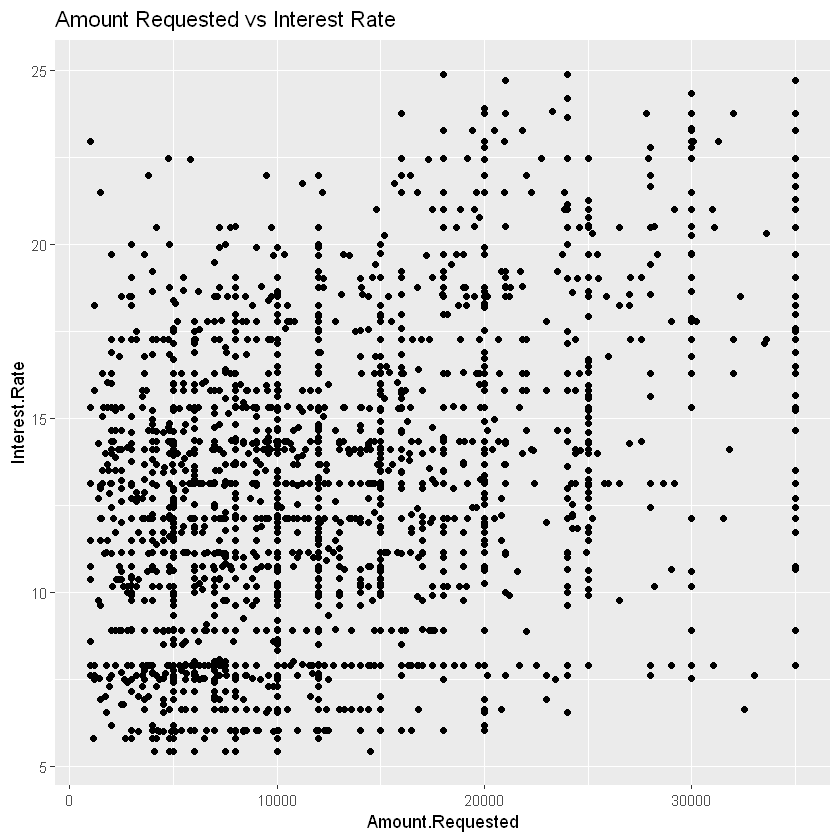

In [19]:
ggplot(df, aes(x= Amount.Requested , y = Interest.Rate )) + geom_point() + ggtitle('Amount Requested vs Interest Rate')


Podemos observar del grafico bastante dispersión y a priori no existe una tendencia clara, sin embargo podemos percibir que una gran cantidad de datos que solicitan montos bajos (menor a 10000), se cobra una tasa de interes baja entre 5 y 15, con un maximo de 20, por otro lado cuando se solicita una cantidad mayor a los 30000 hay muy pocos datos entre una tasa de interes 5 y 10, centrandose en valores mayores a 10 y llegando a un maximo de 25.

Relacionando la experiencia laboral vs la tasa de interés

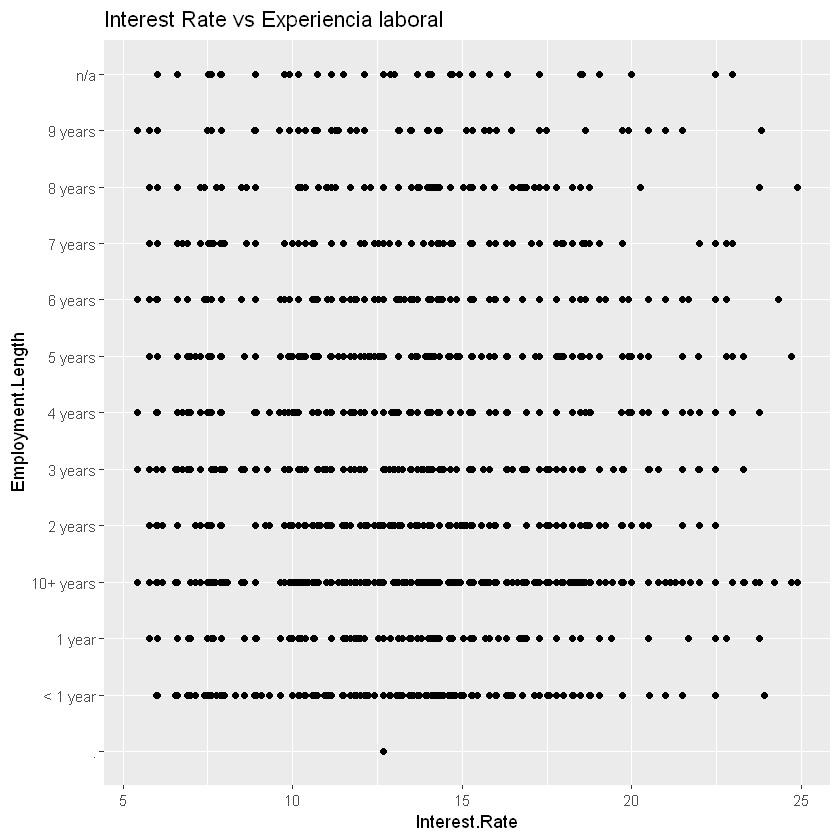

In [20]:
ggplot(df, aes(y= Employment.Length , x = Interest.Rate )) + geom_point() + ggtitle('Interest Rate vs Experiencia laboral')

Es dificil encontrar cierta tendencia o efecto en este gráfico. Observemos mejor un boxplot.

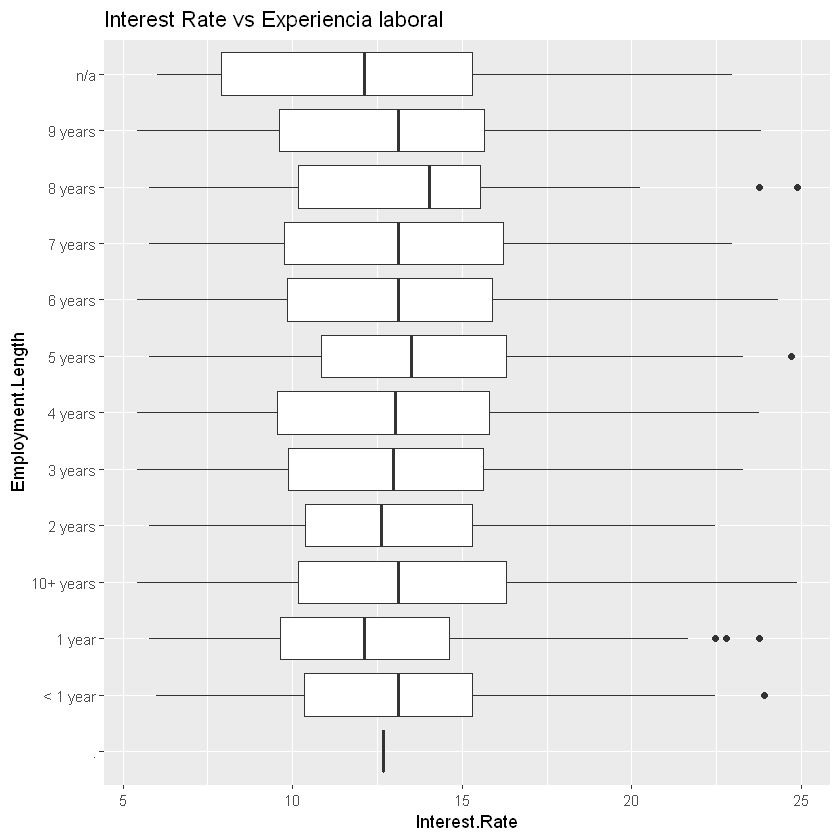

In [21]:
ggplot(df, aes(y= Employment.Length , x = Interest.Rate )) + geom_boxplot() + ggtitle('Interest Rate vs Experiencia laboral')

A grandes rasgos tampoco podemos observar ningun tipo relación entre la experiencia laboral y la tasa de interés. Incluso podemos ver mediante el boxplot que la mediana de las personas con experencia laboral menor a un año es similar a la mediana de una persona que lleva 6, 7 y 9 años de experencia.

Graficamos el logaritmo de los ingresos mensuales en función de la tasa de interés para obtener un gráfico mejor distribuido, ya que de otra forma queda todo concentrado en un solo lugar.

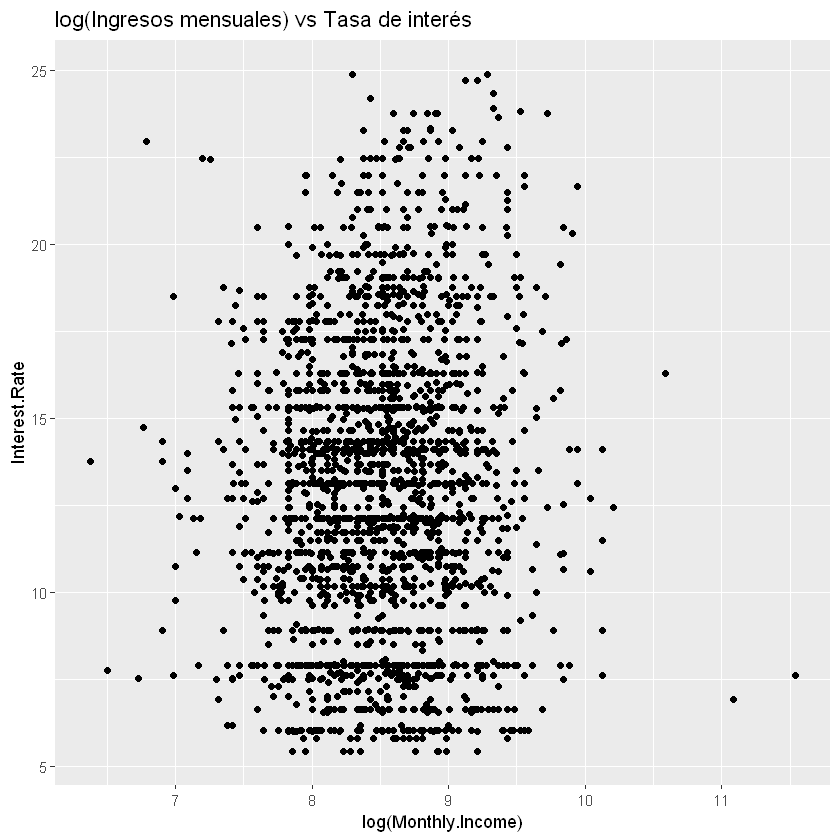

In [22]:
ggplot(df, aes(x=log(Monthly.Income),y=Interest.Rate))+geom_point() + ggtitle('log(Ingresos mensuales) vs Tasa de interés ')

A pesar de aplicar el logaritmo al ingreso mensual, se hace complejo encontrar alguna tendencia o efecto entre el ingreso y la tasa de interes.

Ahora relacionamos el % de deuda de los ingresos totales del cliente con respeto a la tasa de interés:

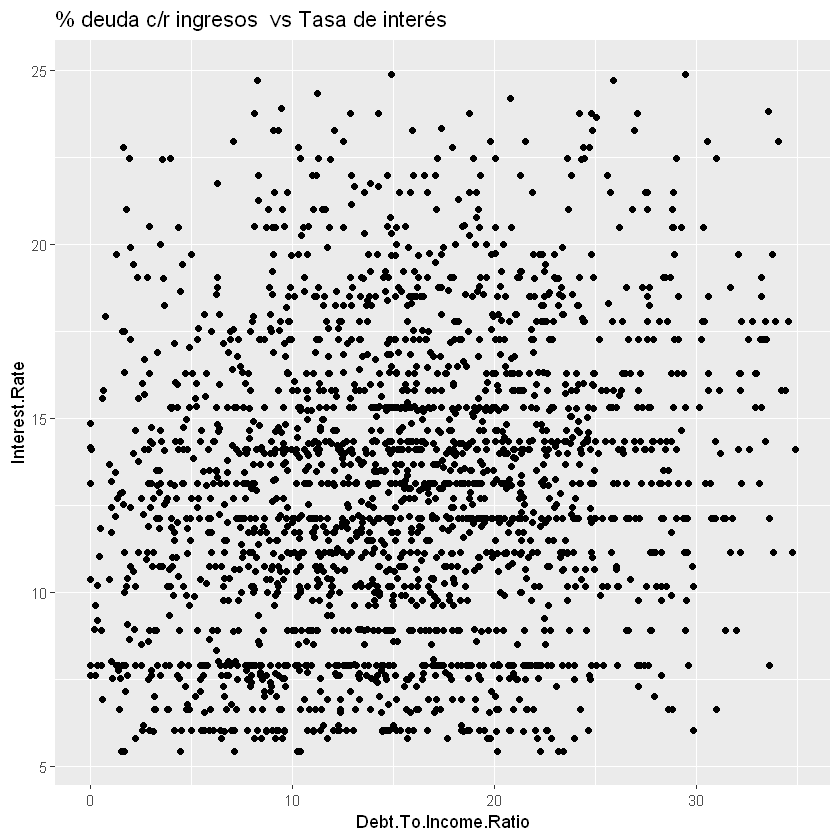

In [23]:
ggplot(df,aes(x=Debt.To.Income.Ratio,y=Interest.Rate))+geom_point()+ggtitle('% deuda c/r ingresos  vs Tasa de interés')

No se logra ver ningun tipo de tendencia, los datos se encuentran bastante dispersos, es bastante complejo analizarlo de esta forma.

Graficamos el estado de la casa del cliente con respecto a al tasa de interés:

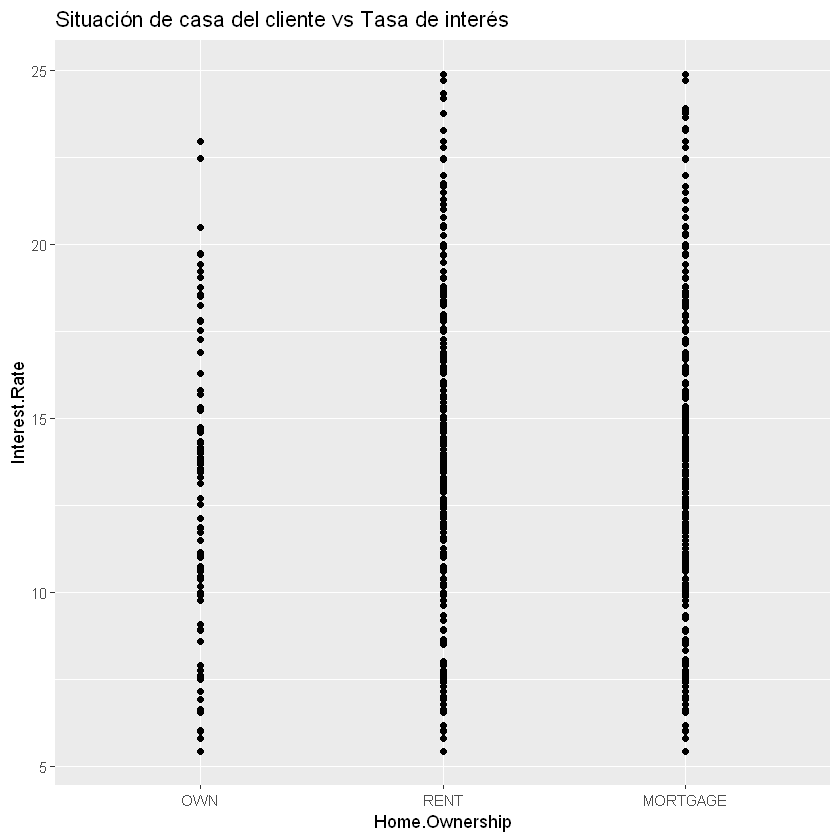

In [24]:
ggplot(df,aes(x=Home.Ownership,y=Interest.Rate))+geom_point()+ggtitle('Situación de casa del cliente vs Tasa de interés')

Si bien existe bastante dispersión, se puede notar que aquellas personas que son propietarios de su casa tienden a alcanzar menores tasas de interés.

Intentemos ver alguna relacion mas tangible mediante un grafico boxplot.

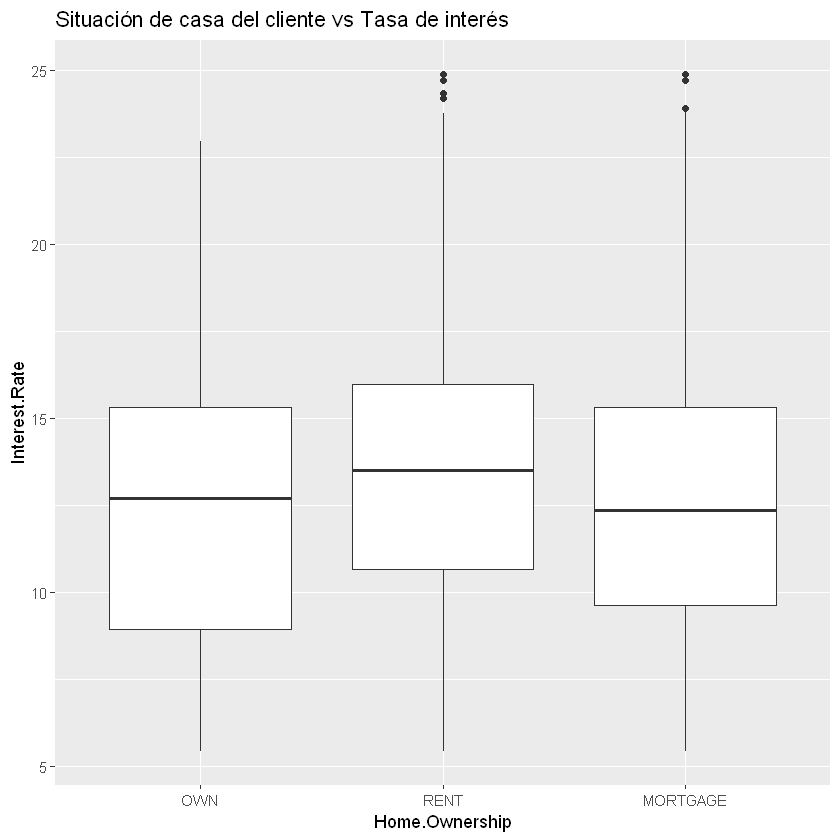

In [25]:
ggplot(df,aes(x=Home.Ownership,y=Interest.Rate))+geom_boxplot()+ggtitle('Situación de casa del cliente vs Tasa de interés')

No podemos identificar ninguna tendencia mediante el bloxpot, aunque si se puede observa una mayor variabilidad en los datos si el cliente es dueño de la casa con respecto a los clientes que arriendan y siguen pagando la hipoteca.

Veamos el plazo del prestamo con respecto a la tasa de interés

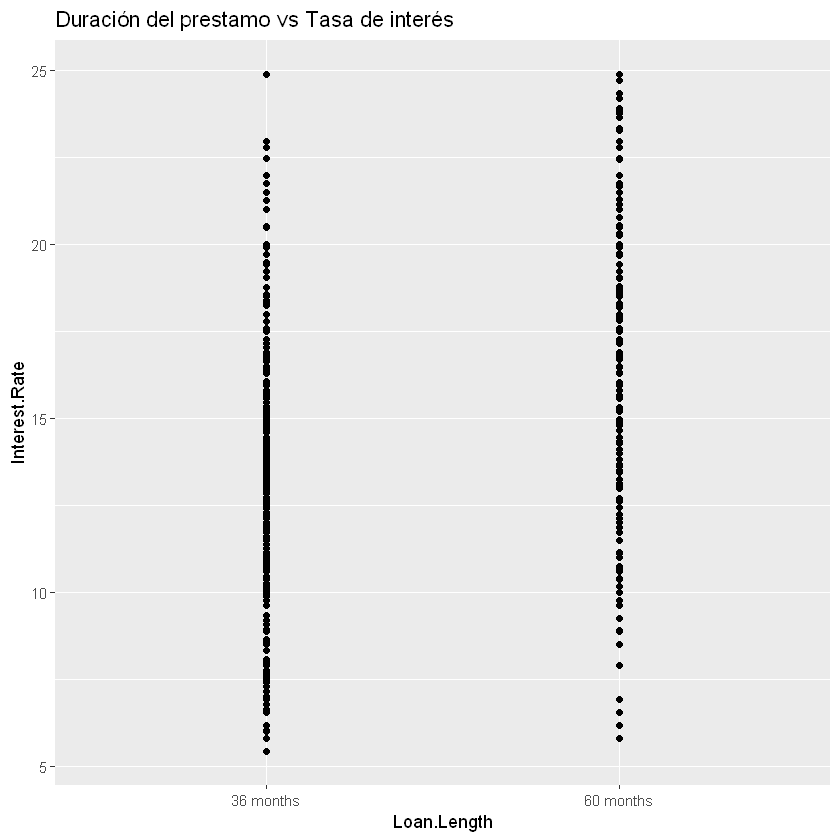

In [26]:
ggplot(df,aes(x=Loan.Length,y=Interest.Rate))+geom_point()+ggtitle('Duración del prestamo vs Tasa de interés')

A priori no se observa muy bien o es complejo analizar alguna tendencia, por lo que haremos un boxplot.

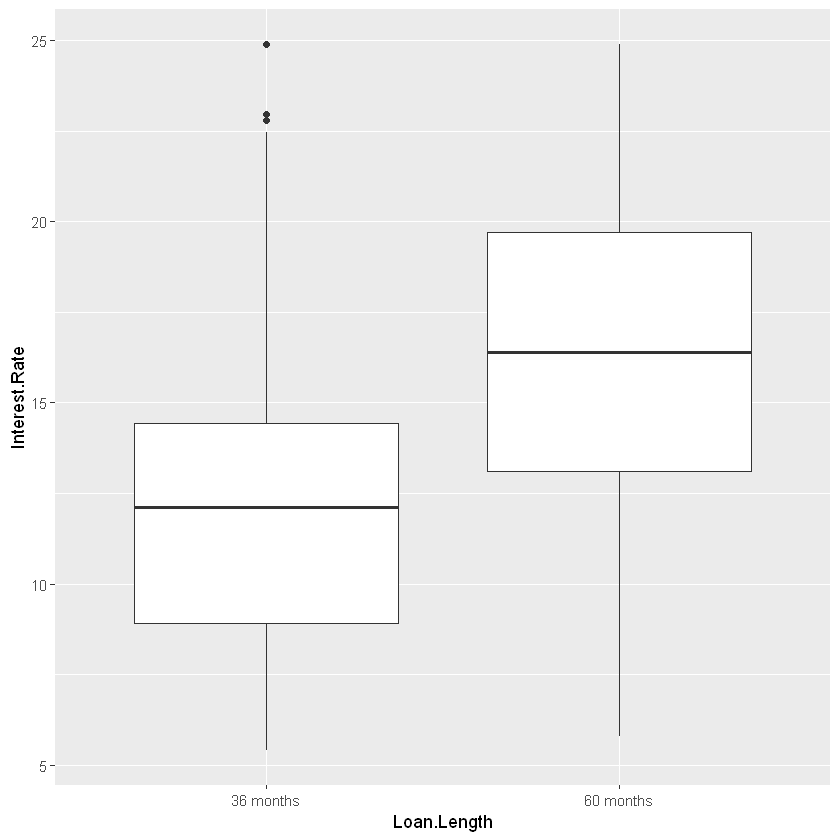

In [27]:
ggplot(df,aes(x=Loan.Length,y=Interest.Rate))+geom_boxplot()

Podemos observar que los créditos con 60 meses de plazo tienen una mayor mediana, ademas alcanzan mayores valores de interes.

Veamos la cantidad de lineas de credito o deudas paralelas vs la tasa de interés

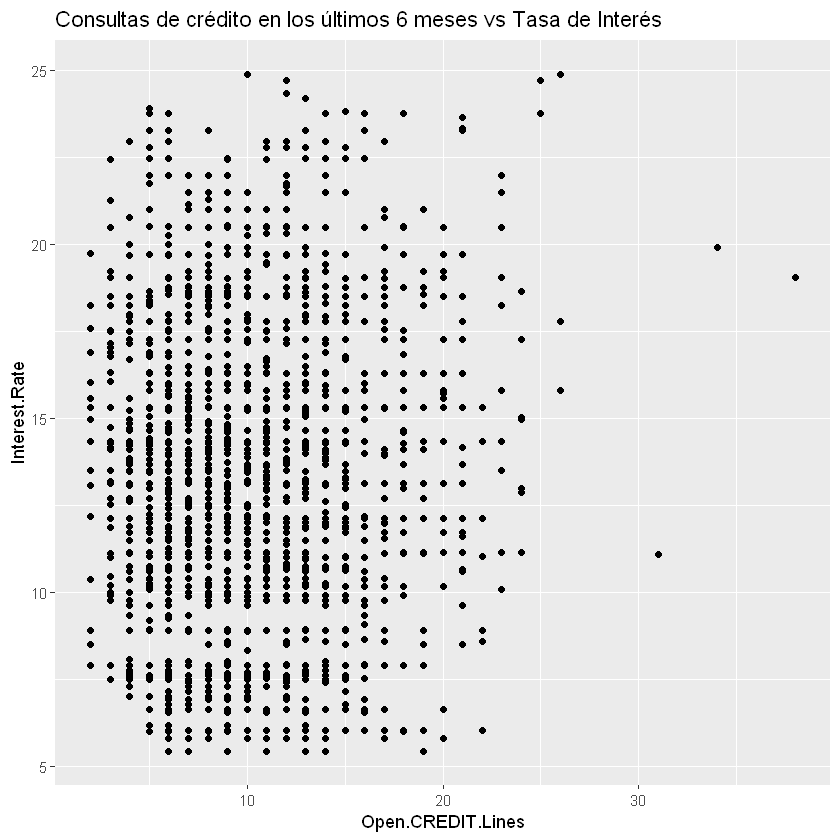

In [28]:
ggplot(df,aes(x=Open.CREDIT.Lines,y=Interest.Rate))+geom_point()+ggtitle('Consultas de crédito en los últimos 6 meses vs Tasa de Interés')

De igual forma, dificil de analizar a primera vista

Veamos las consultas sobre crédito en los últimos 6 meses de los clientes vs la tasa de interés:

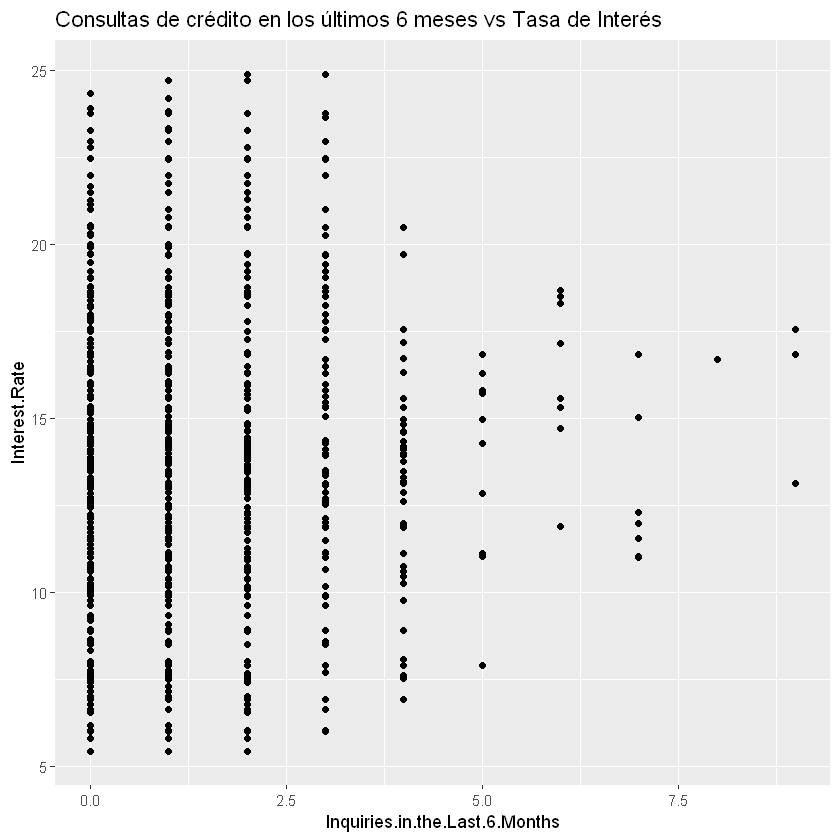

In [29]:
ggplot(df,aes(x=Inquiries.in.the.Last.6.Months,y=Interest.Rate))+geom_point()+ggtitle('Consultas de crédito en los últimos 6 meses vs Tasa de Interés')

No nos dice mucho, mejor veamos un histograma se puede notar mejor

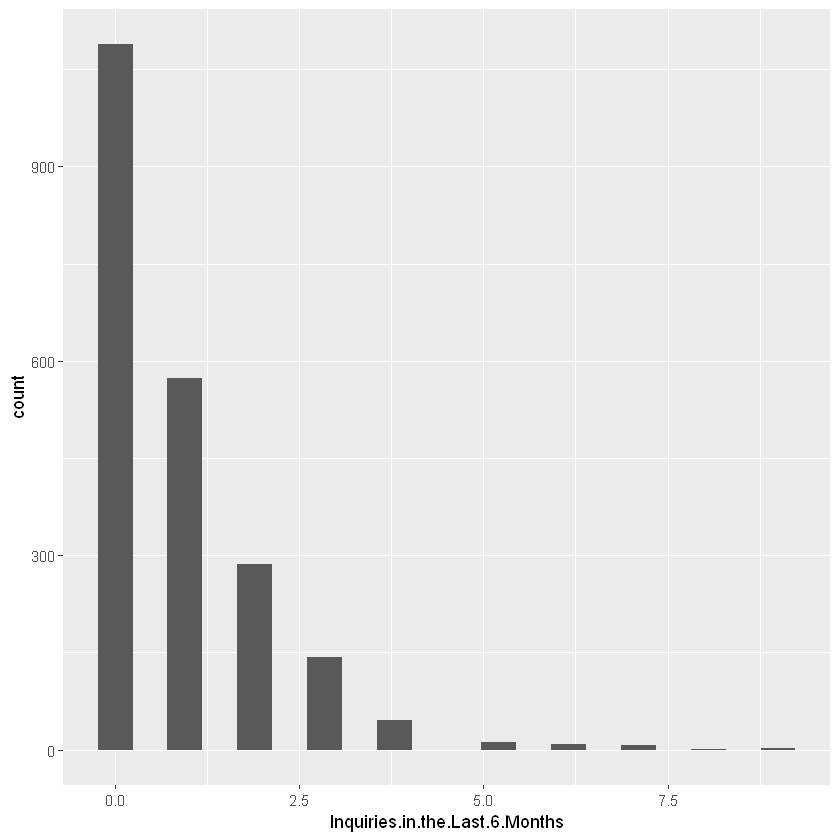

In [30]:
ggplot(df,aes(x=Inquiries.in.the.Last.6.Months))+geom_histogram(bins=20)

Del histograma podemos observar que en su mayoria, los clientes pidieron el crédito por primera vez.

# 4. Analice la relevancia que tiene cada variable con la variable dependiente y entre ellas.

Se cree que las siguientes variables pueden explicar la tasa de interés(cosa que se comprobará más adelante). Asimismo, se explicitará la idea detrás de estas variables y por qué se cree que pueden incidir en la tasa de interés.

- Amount.Requested: Prestar una mayor suma de dinero puede generar más riesgo al banco, por lo que se cree que puede tener efecto sobre la tasa de interés
- Loan.Purpose: Se cree que el propósito del credito puede influenciar la desición de la tasa de interés de parte de los bancos al observar la desesperación del cliente en obtener uno. Asimismo, esta variable se simplificó con la creación de "consumo" que será utilizada para intentar medir el efecto que tiene este propósito en particular.
- Monthly.Income: La tendencia es que gente con mayores ingresos es menos riesgosa por lo tanto puede incurrir en tasas de interés más altas 
- Debt.To.Income.Ratio: La proporción de las deudas también parece ser una variable interesante de considerar, porque aquellas personas que tienen un radio de deuda bastante alto puede no ser de confianza y generar desconfianza al banco.
- Home.Ownership: El estado de la vivienda del cliente puede reflejar por un lado la capacidad de solvencia del cliente y aumentar el riesgo y por ende la tasa de interés, por lo que parece una interesante variable a considerar.
- Loan.Length: Mientras mas larga es la deuda, mayor es el riesgo por lo que podría existir al prestar dinero por un plazo más extendido, por lo que se puede considerar como variable de interés.
- Open.CREDIT.Lines: La cantidad de deudas pararelas pueden ser un indicador de sustento económico de la persona, por lo que puede existir cierto efecto sobre la tasa de interés.
- Inquiries.in.the.Last.6.Months: Desde la perspectiva del banco, aquellas personas que han consultado con mayor frecuencia en los últimos meses algún tipo de crédito podrían estar en una situación desfavorable y por tanto existiría un riesgo mayor en prestar dinero a este tipo de personas.



Con respecto a las variables que no serán de interés:
- Amount.Funded.By.Investors:A priori intuimos que esta variable se correlaciona con las variables que consideramos significativas en nuestro estudio.
- State:Creemos que el estado no es un factor significativo en nuestra variable de estudio.
- FICO.Range: Como lo mencionamos en la parte de investigacion, los factores para calcular la puntuacion Fico, se relacionan directamente con las variables que queremos analizar.
- Revolving.CREDIT.Balance: Esta variable no se considerará, ya que se relaciona con nuestra variable de estudio Open.Credit.Lines.
- Employment.Length: Por lo observado anteriormente en la parte 3, creemos que la exprencia laboral no se relaciona con nuestra variable endogena.

Utilizaremos un código del auxiliar 6 para obtener un gráfico de correlación de personas, junto a las variables numéricas o no categóricas, esto con el fin de obtener conclusiones más objetivas acerca de la relación entre estas.

In [31]:
#Seleccionamos sólo las variables no categoricas.
inCorr <- select(df, -c(ID,Loan.Length, Loan.Purpose, State, Home.Ownership, FICO.Range, Employment.Length, consumo))
cormat <- round(cor(inCorr),2)

In [32]:
#http://www.sthda.com/english/wiki/ggplot2-quick-correlation-matrix-heatmap-r-software-and-data-visualization
get_upper_tri <- function(cormat){
cormat[lower.tri(cormat)]<- NA
return(cormat)
}

In [33]:
upper_tri <- get_upper_tri(cormat)

In [34]:
library(reshape2)
melted_cormat <- melt(upper_tri, na.rm = TRUE)


Attaching package: 'reshape2'


The following object is masked from 'package:tidyr':

    smiths




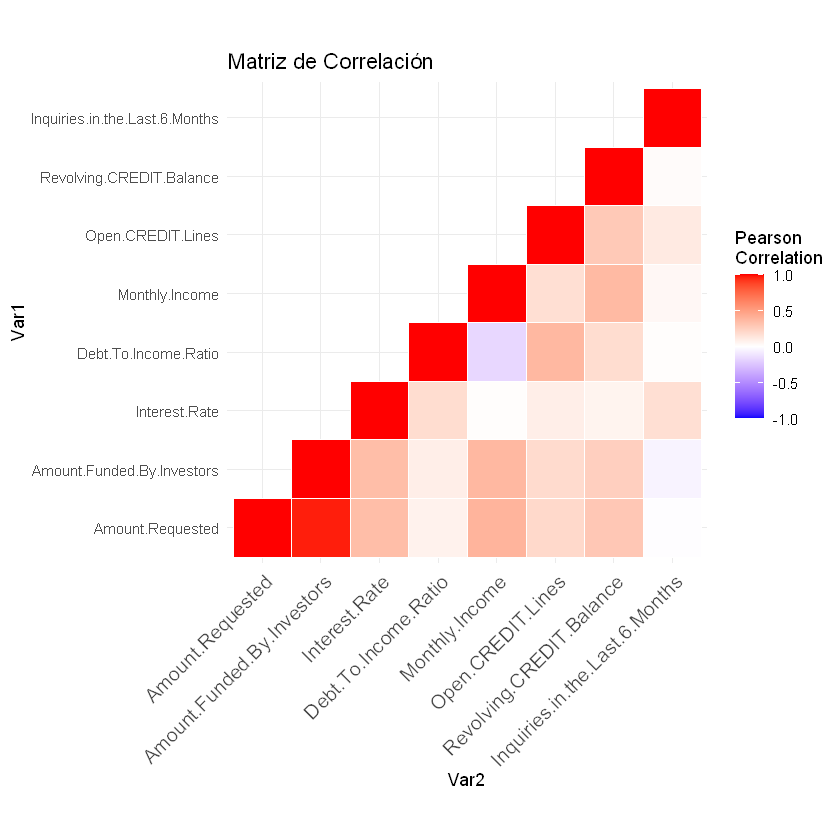

In [35]:
ggplot(data = melted_cormat, aes(Var2, Var1, fill = value))+
geom_tile(color = "white")+
scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
   midpoint = 0, limit = c(-1,1), space = "Lab", 
   name="Pearson\nCorrelation") +
theme_minimal()+ 
theme(axis.text.x = element_text(angle = 45, vjust = 1, 
    size = 12, hjust = 1))+
coord_fixed() +
labs(title='Matriz de Correlación')

Lo mas significativo que podemos observar en el diagrama, es que existe una correlación casi total con respecto a las variables "Amount.Requested" y "Amount.Funded.By.Investor" que tiene toda la lógica, pues obviamente el monto solicitado por el cliente está estrechamente relacionado con lo que realmente recibirá de parte del banco.

De forma general se pueden observar correlaciones parciales en las demás variables no categoricas.

Por ejemplo se puede notar una pequeña correlación entre "Monthly.Income" y "Amount.Requested", esto nos dice que aquellas personas que tienen mayores ingresos piden más dinero al momento de solicitar un crédito, lo que nos hace bastante sentido.

Tambien podemos observar una correlacion entre "Open.CREDIT.Lines" y Debt.To.Income.Ratio, esto es de esperar ya que una persona que tenga una mayor cantidad de deudas paralelas tendra una mayor proporcion de estas en funcion de sus ingresos.

Del mismo modo, podemos observar otra correlación parcial entre "Revolving.CREDIT.Balance" y "Open.CREDIT.Lines", lo que se puede entender como aquellas personas que poseen más lineas de credito o deudas en paralelo al mismo tiempo poseen mayor deuda total.

Por ultimo, es interesante notar que se puede observar una correlación parcial negativa(las anteriores eran correlaciones positivas) entre "Debt.To.Income.Ratio" y "Monthly.Income", es decir, aquellas personas que ganan menos dinero, posee un mayor % de deuda en función de sus ingresos, esto nos hace bastante sentido con lo mencionado en la parte 1, donde las personas con sueldos bajos son bastante riesgosas para el banco.

# Parte 2

Plantee 3 modelos de regresion lineal para la variable dependiente de interes.  Recuerdeque  puede  utilizar  transformaciones  de  las  variables  (cuadraticas, logarıtmicas)  o  agregar interacciones entre ellas.  Adem ́as puede eliminar observaciones que ensucien su analisis. La elección de las variables utilizadas y su forma de ser incorporada al modelo debe sustentarseen los analisis realizados en la Parte 1 de esta Tarea.

Luego,  analice los resultados obtenidos:  compareR2,  test de hipótesis correspondientesy  concluya  con  respecto  a  los  efectos  (significativos  o  no)  estimados.   Luego,  responda  las siguientes dos preguntas:

Al igual que en la parte anterior, nuestras Variables de interés:
- Amount.Requested
- Loan.Length
- Loan.Purpose
- Debt.To.Income.Ratio
- Home.Ownership
- Monthly.Income
- Open.CREDIT.Lines
- Inquiries.in.the.Last.6.Months

Para nuestro estudio consideraremos los siguientes 3 modelos. El primer modelo se consideraran las variables que no se relacionan directamente con las caracteristicas de la persona, mas bien se basa en las decisiones del cliente al pedir dicho credito, estas variables exogenas a estudiar seran el monto solicitado, la duración del credito y el propósito de este. En el segundo modelo relacionaremos todas las variables restantes , es decir el estado de la vivienda, sus ingresos, deuda, lineas de credito y las consultas en los ultimos 6 meses, estas creemos que se relacionan directamente con las características observables de la personas. Finalmente el tercer modelo considerara todas las variables de interés, la idea es encontrar que modelo representa de mejor manera el efecto sobre la tasa de interés.



Modelo 1:(Variables propias del crédito)
\begin{equation*}
    TasaInteres = \beta_{0} + \beta_{1}X_{Cantidad} + \beta_{2}X_{Duración} + \beta_{3}X_{Consumo} + \epsilon
\end{equation*}

Modelo 2:(Variables propias de la persona que solicita un crédito)
\begin{equation*}
    TasaInteres = \beta_{0} + \beta_{1}X_{Propiedadvivienda} + \beta_{2}X_{Ingresos} + \beta_{3}X_{Deuda} + \beta_{4}X_{LineasCredito} + \beta_{5}X_{Consultas}+ \epsilon
\end{equation*}

Modelo 3:(todas las variables de interés)
\begin{equation*}
    TasaInteres = \beta_{0} + \beta_{1}X_{Cantidad} + \beta_{2}X_{Duración} + \beta_{3}X_{Consumo} + \beta_{4}X_{Propiedadvivienda} + \beta_{5}X_{Ingresos} + \beta_{6}X_{Deuda} + \beta_{7}X_{LineasCredito} + \beta_{8}X_{Consultas}+ \epsilon
\end{equation*}

Utilizamos esta librería para poder comparar de mejor forma los modelos

In [51]:
library(stargazer) #Libreria para visualizar modelos en conjunto

model_1 <- lm(Interest.Rate ~ Amount.Requested + Loan.Length + consumo , data = df)
model_2 <- lm(Interest.Rate ~ Home.Ownership + Monthly.Income + Debt.To.Income.Ratio + Open.CREDIT.Lines + Inquiries.in.the.Last.6.Months, data = df)
model_3 <- lm(Interest.Rate ~ Amount.Requested + consumo + Loan.Length + Home.Ownership + Monthly.Income + Debt.To.Income.Ratio + Open.CREDIT.Lines + Inquiries.in.the.Last.6.Months, data = df)

stargazer(model_1,model_2,model_3,type="text")


                                                           Dependent variable:                            
                               ---------------------------------------------------------------------------
                                                              Interest.Rate                               
                                          (1)                      (2)                      (3)           
----------------------------------------------------------------------------------------------------------
Amount.Requested                       0.0001***                                         0.0001***        
                                       (0.00001)                                         (0.00001)        
                                                                                                          
Loan.Length60 months                   3.489***                                           3.338***        
                                    

A priori se puede observar que el $R^{2}$ del modelo 1 es mayor que el del modelo 2, es decir, explica mejor la variabilidad de los datos y por ende la tasa de interés. El modelo 3 que considera todas las variables de interés posee el mayor $R^{2}$, lo cual tiene sentido ya que contempla todas las variables de interés.

Con respecto al modelo 1:
- Todas las variables son significatrivas al 1%.
- Un aumento de un peso en el monto solicitado aumenta en 0.0001 puntos la tasa de interés.
- Los créditos a plazo de 60 meses poseen tasas de interés de 3.498 puntos más altas que los creditos a 30 meses.
- Los creditos con propósito de consumo poseen una tasa de interés de 0.69 puntos menor con respecto a creditos que no son para el consumo.

Con respecto al modelo 2:
- El porcentaje de deuda en relación a los ingresos(Debt.To.Income.Ratio) y la cantidad de consultas sobre créditos(Inquiries.in.the.Last.6.Months) son significativas al 1%  
- El ingreso mensual(Monthly.Income) y si la persona es arrendatario(Home.OwnershipRENT) son significativas al 5%.
- Las lineas de crédito(Open.CREDIT.Lines) y si la persona posee la casa hipotecada(Home.OwnershipMORTGAGE) no son significativas.

_De las variables significativas:_
- Si el cliente es arrendatario, posee una tasa de interés en promedio de 0.819 puntos mayor en contraste con ser dueño de su casa(que es la categoria base que dejamos para hacer la comparación).
- Un aumento de un peso en los ingresos mensuales aumenta en 0.0001 puntos la tasa de interés.
- Un aumento de una unidad en el % de la deuda con respecto a sus ingresos totales, aumenta en 0.102 puntos la tasa de interés.
- Una consulta adicional por un crédito aumenta en 0.599 puntos la tasa de interés.

Con respecto al modelo 3:
- El monto solicitado, la duración del prestamo, si el propósito es de consumo, el ingreso mensual, el \% de deuda y las consultas de crédito en los últimos 6 meses son significativas al 1%.
- En este caso, la variable categórica de renta e hipoteca(Mortgage) son significativas al 5%.
- Las lineas de deuda o crédito nuevamente no son significativas en este modelo en conjunto.

_De las variables significativas:_
 - Al igual que en el modelo 1, al aumentar en una unidad monetaria el monto solicitado, la tasa de interés aumenta en 0.0001 puntos
 - Los créditos a plazo de 60 meses poseen tasas de interés de 3.338 puntos más altas que los creditos a 30 meses
 - Los creditos con propósito de consumo poseen una tasa de interés de 0.507 puntos menor con respecto a creditos que no son para el consumo.
 - Una persona que arrienda en comparación a una persona dueña de su casa(variable base, con respecto a la cual se compara en este caso) posee una tasa de interés 0.613 puntos más alta.
 - Una persona que posee la casa hipótecada en comparación a una persona que es dueña de su casa posee una tasa de interés 0.605 mas baja.
 - Un aumento de una unidad monetaria en los ingresos del cliente produce una reducción de -0.0001 puntos en la tasa de interés.
 - Un aumento de una unidad porcentual en la deuda del cliente respecto a sus ingresos produce un aumento de 0.079 puntos en la tasa de interés.
 - Una consulta adicional sobre algún tipo de crédito en los últimos 6 meses produce un aumento de 0.583 puntos en la tasa de interés.
 
*Nota: Como la tasa de interés se dejó en escala 0-100(%), las variaciones son directamente porcentuales, es decir, un aumento de x puntos en la variable exógena, aumenta en (+x%) la tasa de interés*. Para que se entienda cuando se habla de "puntos".

Considerando el tercer modelo como base, vamos a estudiar si el paso del modelo 1 al modelo 3 es significativo.

Consideraremos el siguiente escenario, donde se considearará un modelo irrestricto(U) y otro restringdo(R)

\begin{eqnarray*}
    (R) TasaInteres &=& \beta_{0} + \beta_{1}X_{Cantidad} + \beta_{2}X_{Duración} + \beta_{3}X_{Consumo} + \epsilon \\
    (U) TasaInteres &=& \beta_{0} + \beta_{1}X_{Cantidad} + \beta_{2}X_{Duración} + \beta_{3}X_{Consumo} + \beta_{4}X_{Propiedadvivienda} + \beta_{5}X_{Ingresos} + \beta_{6}X_{Deuda} + \beta_{7}X_{LineasCredito} + \beta_{8}X_{Consultas}+ \epsilon
\end{eqnarray*}

Para efectos prácticos se quiere testear lo siguiente:

\begin{eqnarray*}
H_{0} :& \beta_{4} = \beta_{5} = \beta_{6}= \beta_{7}= \beta_{8}= 0 \\ 
H_{A} :& \sim
\end{eqnarray*}

Es decir, testear si el subconjunto de variables de características propias de los clientes son significativas. Ya que segun lo obtenido en el modelo 2, estas variables explicaban muy o casi nada de la variable endogena tasa de interés.

Utilizando el siguiente estadístico:
\begin{eqnarray*}
F = \frac{(SSE_{R} - SSE_{U})/g}{SSE_{U}/n-(k+1)} \sim F_{g,n-(k+1)}
\end{eqnarray*}

Donde para este caso,

 - $g = 5$(variables a testear)
 - $n = 2,169$(obs del modelo U)
 - $k = 8$(n° de vars de U)

Procedemos a calcular $SSE_{R},SSE_{U}$.

In [37]:
#El modelo 3 es el irrestricto. Rescatamos los residuos de la regresión
SSE_u = sum(model_3$residuals*model_3$residuals)
#El modelo 1 es el restringido
SSE_r = sum(model_1$residuals*model_1$residuals)
print(paste("SSE_u=",SSE_u))
print(paste("SSE_r=",SSE_r))

[1] "SSE_u= 26932.0350308057"
[1] "SSE_r= 29480.0790586529"


Luego:

\begin{eqnarray*}
F = \frac{(29.480 - 26.932)/5}{26.932/(2.169-(8+1))} \sim F_{8,2160}
\end{eqnarray*}

In [38]:
g = 5
n = 2169
k = 8 

F_est = ((SSE_r-SSE_u)/g)/(SSE_u/(n-k-1))
print(paste("F_est=",F_est))

[1] "F_est= 40.8715872666479"


A un nivel de significancia del 5% buscamos $F_{8,2160}$.

In [39]:
alpha = 0.05
F_alpha = qf(1-alpha, df1 = g, df2 = n-k-1) 
print(paste("F_alpha=",F_alpha))

[1] "F_alpha= 2.21823981030334"


Como $F_{est}>F_{8,2160}$. A un 5% de significancia se rechaza la hipótesis nula. Por lo que al menos uno de los coeficientes es significativo. Por lo que se obtiene una mejora al agregar las variables del modelo 2. 

### 1. ¿A que se debe los resultados que obtiene?

La forma en que se plantearon los modelos nos parecen interesantes, porque por un lado nos dan a entender que las carácteristicas de cada persona no explican muy bien el efecto que se tiene sobre la tasa de interés y sí lo hacen, en mejor forma, las variables que tienen que ver solamente con las características del crédito, como lo es, la cantidad solicitada y la duración de este. Nos da a entender que la tasa de interés no se puede explicar unicamente o de buena forma por las carácteristicas de la persona, y hay variables que parecieran influir más en la explicación de nuestra variable endógena, o mas bién pareciera que el efecto es más grande en aquellas variables escencialmente económicas que sociales. 

De igual forma hay variables que poseen un efecto bastante pequeño o marginal con respecto a la tasa de interés, las cuales son significativas pero su efecto es menor. De las variables consideradas en el modelo 3 la que más impacto tiene sobre la tasa de interés es la duración del credito de 60 meses en comparación a uno de 36 meses, lo cual hace sentido con la realidad, porque prestar dinero a más largo plazo genera más riesgo para el banco, y como sabemos que el dinero pierde valor a medida que pasa el tiempo, como medida de reducción de riesgo y de estos efectos la tasa de interés tiende a ser más alta.

También es interesante observar que las lineas de crédito o deudas paralelas del cliente no son significativas en ambos modelos(2 y 3), lo que hace presagiar que no tienen un efecto sobre la tasa de interés. Esto se puede deber a que un cliente que posee muchas lineas de crédito no necesariamente significa que es más riesgoso, sino que puede tener gran capacidad económica que le permita endeudarse, de la misma forma que un cliente tenga menos lineas de crédito no significa que es menos riesgoso, de igual forma puede deberse a que los bancos no le permiten nuevas lineas de crédito. Asi que no sería no tendría tal efecto sobre la tasa de interés porque pueden dar multiples escenarios que dependen de otras variables.

Con respecto a la variable categórica que me dice si el cliente posee la casa hipotecada(Home.OwnershipMORTGAGE), en el modelo 2 que consideramos no es significativa, sin embargo al pasar al modelo 3, agregándole las variables de cantidad solicitada, plazo del crédito y proposito de este, pasa a ser significativa a un 5%. Esto se puede deber a que explica mejor el efecto sobre la tasa de interés en comparación a ser dueño de la casa(la categoria base considerada) en conjunto con estas 3 variables, puede existir una correlación parcial que produce una mejor explicación del efecto en conjunto.

### 2.  ¿Identifica algun problema de endogeneidad en su analisis?  ¿Como podrıa solucionarse?



Efectivamente hay problemas de endogeniedad en nuestro analis ya que obtuvimos $R^{2}$ relativamente bajos en nuestros modelos. Por lo que nuestra variabilidad esta explicada en gran parte por el error o simplemente faltaron variables que pudieran dar respuesta a nuestra variable endógena de estudio. Algunas de las variables que no se podrían estar considerando en nuestros modelos de regresion lineal realizados; el estado de la economía tanto a nivel país como globalmente, este tiene un efecto directo sobre la tasa de interés el cual no estamos considerando, por ejemplo si la economía está pasando por un estancamiento, hay una catastrofe natural a nivel país, que el dolar disminuya o aumente su valor, la inflación, variaciones en la tasa de interes del banco central, etc, claramente esto afectará que la tasa de intereses aumente o disminuya. Tambien otra variable que podría estar afectando a nuestro modelo son las regulaciones del país en temas financieros, asi como también subsidios de parte del estado a las personas a través de créditos con entidades financieras. Todo esto tiene efecto directo sobre la tasa de interés que el banco ofrece, el cual no se está considerando en el modelo y queda escondido en el error. Otra variable a considerar es el nivel de eduacion de la persona, se podria llegar a pensar que una persona al tener un nivel de eduacion 'bajo' no tiene las herramientas necesarias a nivel educacional, para determinar si dicha tasa de interes es excesiva o acorde a lo que él esta solicitando, tambien podriamos pensar que está persona no es capaz de investigar la mejor tasa de interes entre los distintos bancos, por lo que se podria esperar que estas tengan una correlacion negativa, a menor nivel de educacion mayor tasa de interes y viceversa.

Y también no se están considerando las regulaciones del país en temas financieros, asi como también subsidios de parte del estado a las personas a través de créditos con entidades financieras. Todo esto tiene efecto sobre la tasa de interés, el cual no se está considerando y queda escondido en el error. 

La solución a estos problemas de endogeneidad se puede dar agregando aquellas variables que no se están considerando, que son cuantificables y medibles lo que puede mejorar nuestro modelo obteniendo un menor error asociado. El tema nace que hay ciertas variables como las mencionadas que pueden ser complejas de cuantificar, ya que estas dependen de un contexto en especifico o hay un gasto asociado muy grande para poder identificarlas. Por lo mencionado sería muy complejo agregar estos datos aun así cuando estas se relacionan con nuestra variable de estudio. Sin embargo se podría intentar buscar una forma de aislar los efectos, realizar buenos diseños de experimentos, rigurosidad con nuestros supuesto OLS, para así poder evitar el sesgo que se produce y explicar nuestro modelo de la mejor forma posible.